In [18]:
import seaborn as sns
import os
import pandas as pd

def get_text(folder = './BERT/result/'):
    files = []
    for root,dirs,fs in os.walk(folder):
        files = [folder+f for f in fs]

    df_res = None
    for f in files:
        df = pd.read_csv(f, usecols=["Against Biden","Favor Biden","None Biden","Against Trump","Favor Trump","None Trump"])
        df_res = pd.concat([df_res,df], axis=0, sort=False)

    return df_res


df_res = get_text('../BERT/result/')
df_user = get_text('../BERT/user_feature/')

In [ ]:
df_a = df_res.copy(deep=True)

In [32]:
def trunc(x):
    a = x['Favor Biden'] / x['Against Biden']
    if a >= 5:
        return 10
    elif a <= 0.2:
        return 0
    else:
        return 5

df_a['Biden'] = df_a.apply(trunc, axis=1)
# df_a['Trump'] = df_a.apply(trunc, axis=1)

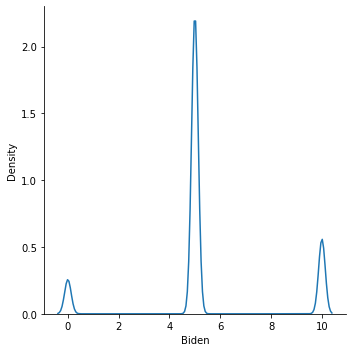

In [33]:
sns.displot(data=df_a, x="Biden", kind="kde")
# sns.displot(data=df_a, x="Trump", kind="kde")

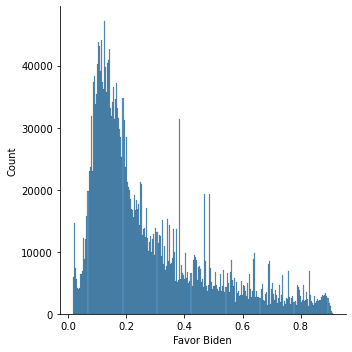

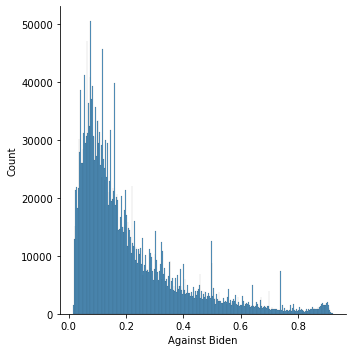

In [10]:
sns.displot(data=df_res, x="Favor Biden")
sns.displot(data=df_res, x="Against Biden")

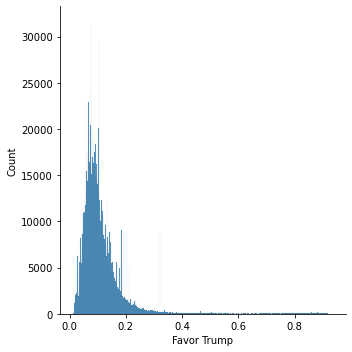

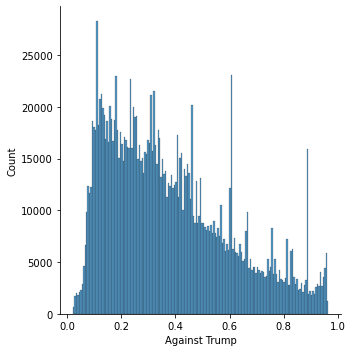

In [34]:
sns.displot(data=df_user, x="Favor Trump")
sns.displot(data=df_user, x="Against Trump")